# Travelling Sales man

You have a graph with a multiple node and you need to find the path that traverses all the nodes once, that path is called hamiltonian cycle.

Travelling Sales man problem is about finding the hamiltonian cycle with the least cost of all hamiltonian cycles in the graph.    

Finding such a path is easier said than done, finding the exact solution for this problem for large graphs (>25 nodes) is NP-complete and that is when we resort to do approximations and heuristics.    

You can find excellent essay exploring these methods here [tsp-essay](https://github.com/rsalmei/tsp-essay).  

We will implement in this notebook two of the most straight forward solutions for such a problem, finding all the combinations of the nodes and our desired path is the combination with te least weight, with complexity of $O(n!)$, which make this algorithm has unrealistic complexity for n>10. There is other algorithm, we will explored in the notebook based on saving dynamic programming state of the graph and it has complexity of $O(2^n*n^2)$ which is unpractical for more than 25 nodes.

# Algorithms

let's first build our graph using `networkx`

In [ ]:
# run this if YOU ARE on google cloud
!pip3 install networkx
# upload utils.py to your cloud instance

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

In [3]:
edges = [(1,2,{'weight':4}),
         (1,3,{'weight':2}),
         (1,4,{'weight':9}),
         (1,5,{'weight':12}),
         (2,3,{'weight':7}),
         (2,4,{'weight':5}),
         (2,5,{'weight':5}),
         (3,4,{'weight':4}),
         (3,5,{'weight':10}),
         (4,5,{'weight':3})]

Fortunately the graph is complete K<sub>5</sub> so we wouldn't worry if we can get from a certain node to another

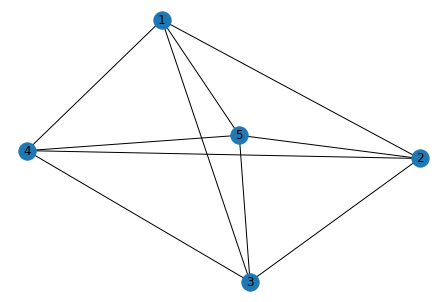

In [4]:
G.add_edges_from([*edges]) 
nx.draw(G, with_labels=True)

### Naive Algorithm

just print all the combinations 

__TSM-NAIVE__(graph) returns hamiltonian path    
&emsp;_MinimumWeight_ &larr; $infinity$    
&emsp;_MinimumPath_ &larr; _nill_  
&emsp;__for__ permutation __in__ _graph_._nodes_  
&emsp;&emsp; __if__ Weight(_permutation_) &lt; _MinimumWeight_  
&emsp;&emsp;&emsp; _MinimumWeight_ &larr; Weight(_permutation_)  
&emsp;&emsp;&emsp; _MinimumPath_ &larr; _permutation_  
&emsp;&emsp; __endif__  
&emsp;__endfor__  
&emsp;return _MinimumPath_  

In [8]:
from itertools import permutations
from utils import *
from math import inf

In [9]:
minimumWeight = inf
minimumPath = None

# iterating through all permutations
for permutation in permutations(list(G.nodes()), len(G.nodes())):
    if getWeight(G, permutation) < minimumWeight:
        minimumWeight = getWeight(G, permutation)
        minimumPath = permutation
    # generating all permutations and printing their weights
    print(permutation, ">>>", getWeight(G, permutation))

(1, 2, 3, 4, 5) >>> 30
(1, 2, 3, 5, 4) >>> 33
(1, 2, 4, 3, 5) >>> 35
(1, 2, 4, 5, 3) >>> 24
(1, 2, 5, 3, 4) >>> 32
(1, 2, 5, 4, 3) >>> 18
(1, 3, 2, 4, 5) >>> 29
(1, 3, 2, 5, 4) >>> 26
(1, 3, 4, 2, 5) >>> 28
(1, 3, 4, 5, 2) >>> 18
(1, 3, 5, 2, 4) >>> 31
(1, 3, 5, 4, 2) >>> 24
(1, 4, 2, 3, 5) >>> 43
(1, 4, 2, 5, 3) >>> 31
(1, 4, 3, 2, 5) >>> 37
(1, 4, 3, 5, 2) >>> 32
(1, 4, 5, 2, 3) >>> 26
(1, 4, 5, 3, 2) >>> 33
(1, 5, 2, 3, 4) >>> 37
(1, 5, 2, 4, 3) >>> 28
(1, 5, 3, 2, 4) >>> 43
(1, 5, 3, 4, 2) >>> 35
(1, 5, 4, 2, 3) >>> 29
(1, 5, 4, 3, 2) >>> 30
(2, 1, 3, 4, 5) >>> 18
(2, 1, 3, 5, 4) >>> 24
(2, 1, 4, 3, 5) >>> 32
(2, 1, 4, 5, 3) >>> 33
(2, 1, 5, 3, 4) >>> 35
(2, 1, 5, 4, 3) >>> 30
(2, 3, 1, 4, 5) >>> 26
(2, 3, 1, 5, 4) >>> 29
(2, 3, 4, 1, 5) >>> 37
(2, 3, 4, 5, 1) >>> 30
(2, 3, 5, 1, 4) >>> 43
(2, 3, 5, 4, 1) >>> 33
(2, 4, 1, 3, 5) >>> 31
(2, 4, 1, 5, 3) >>> 43
(2, 4, 3, 1, 5) >>> 28
(2, 4, 3, 5, 1) >>> 35
(2, 4, 5, 1, 3) >>> 29
(2, 4, 5, 3, 1) >>> 24
(2, 5, 1, 3, 4) >>> 28
(2, 5, 1, 4

In [10]:
minimumPath 

(1, 2, 5, 4, 3)

In [11]:
minimumWeight

18

In [12]:
# we need to stitch the end of this path with the front to get our cycle
# this stitching has been taken care of in getWeight function
TSM_cycle = minimumPath + (minimumPath[0],)
TSM_cycle

(1, 2, 5, 4, 3, 1)

In [13]:
E = getEdges(TSM_cycle)

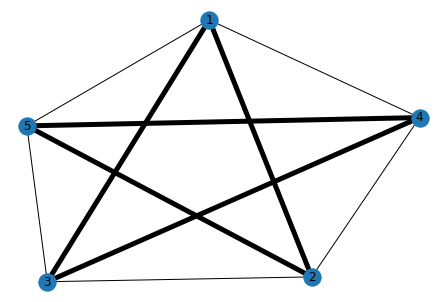

In [14]:
nx.draw(G, with_labels = True, width = [5 if edge in E or tuple(reversed(edge)) in E else 1 for edge in G.edges()])

### Dynamic Programming

*to do*